### Codio Activity 23.3: Using a Pre-trained Network

**Expected Time = 90 minutes**

**Total Points = 50**

This activity introduces the use of a pretrained network with `keras`.  There are many available models, but you will use one that can be fit with smaller image examples.  To do so, you will use the `EfficientNetV2B0` model with the `cifar10` dataset from `keras`.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

Run the code cell below to import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


import warnings

warnings.filterwarnings("ignore")

#### Information on the Model and Dataset

For more information on the model you can consult the paper from its origin [here](https://arxiv.org/abs/1905.11946) and the `keras` documentation on the model [here](https://keras.io/api/applications/efficientnet/).  For your purposes, keep in mind that this model has been trained on 1000 image classes and you will use the resulting feature maps to transform the `cifar10` data.

**The Data**

This dataset contains 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. 

The categories are:

|Label	|Description|
| ------ | ------- |
|0	|airplane|
|1	|automobile|
|2	|bird|
|3	|cat|
|4	|deer|
|5	|dog|
|6	|frog|
|7	|horse|
|8	|ship|
|9	|truck|

[Back to top](#-Index)

### Problem 1

#### Dowloading the model

**10 Points**

Below, use the `EfficientNetV2B0` function with the appropriate  `input_shape` and the argument `include_top` equal to `False` to load the base model. Assign your result to the variable `base_model`.


In [3]:
### GRADED
tf.random.set_seed(42)
base_model = EfficientNetV2B0(input_shape=(32, 32, 3), include_top=False)

### ANSWER CHECK
print(base_model)

2024-07-21 21:12:31.748890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-21 21:12:31.748976: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-21 21:12:31.749029: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (almanacorigin-gorillaoberon): /proc/driver/nvidia/version does not exist
2024-07-21 21:12:31.749451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


24274472/24274472 [==============================] - 0s 0us/step


[Back to top](#-Index)

### Problem 2

#### Loading and Preparing the Data

**10 Points**

In the code cell below, use the function `load_data()` on `cifar10` to prepare the target variables. Assign the result to `(X_train`, `Y_train), (X_test, Y_test)`.

Next, use the function `to_categorical` with argument `Y_train` and assign the result to `Y_train`.

Finally, use the function `to_categorical` with argument `Y_test` and assign the result to `Y_test`.



In [4]:
from tensorflow.keras.datasets import cifar10

In [11]:
### GRADED
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(50_000, 32, 32, 3)
X_test = X_test.reshape(10_000, 32, 32, 3)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


### ANSWER CHECK
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


[Back to top](#-Index)

### Problem 3

#### Generating Feature Maps

**10 Points**

To use the pretrained network, use the `.predict` method with argument equal to `X_train_sample` on `base_model`. Assign the results as `features`.  


In [12]:
# for speeding up the process
X_train_sample = X_train[:10]
y_train_sample = Y_train[:10]

In [14]:
### GRADED
tf.random.set_seed(42)
features = base_model.predict(X_train_sample)

### ANSWER CHECK
print(features.shape)

1/1 [==============================] - 4s 4s/step
(10, 1, 1, 1280)


[Back to top](#-Index)

### Problem 4

#### Making Predictions for Data

**10 Points**

Below, use the function `Sequential` to create a neural network named `top` using the following architecture:

- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 100 nodes and `relu` activation
- One `Dense` output layer 10 noded and with `softmax` activation

Compile `top` using `categorical_crossentropy` as your loss and  `accuracy` as your metric.

Use the `fit()` function on the `top` network to fit the training data `features` and `Y_train`. Set the argument `validation_split` equal to `0.2`, the argument `epochs` equal to 5, and the argument `verbose` equal to 0.  Assign the result to the variable `history` below. 


In [16]:
### GRADED
tf.random.set_seed(42)
top = Sequential(
    [
        Flatten(),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

top.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = top.fit(features, Y_train, epochs=5, verbose=0, validation_split=0.2)

### ANSWER CHECK
print(history.history["accuracy"][-5:])
print(history.history["val_accuracy"][-5:])

[0.0, 0.5, 0.875, 0.625, 0.875]
[0.0, 0.0, 0.0, 0.0, 0.0]


[Back to top](#-Index)

### Problem 5

#### Predicting Test Data

**10 Points**

To make predictions, use the function `predict()` on `base_model` with argument `X_test[:10]`. Assign the result to `test_features`.

Next, use the function `predict()` on the `top` object with argument equal to `test_features`. Use the function NumPy  function `argmax` to retrieve the indices of the maximum elements in the array along the `axis` 1.
Assign the result to the variable `preds`.

HINT: The pseudocode for this last step is given below:

```Python
preds = np.argmax(conv_model.predict(...), axis = ...)
```

In [21]:
### GRADED
tf.random.set_seed(42)
test_exs = X_test[:10]
test_features = base_model.predict(test_exs)
test_preds = top.predict(test_features)

### ANSWER CHECK
print(test_preds)

1/1 [==============================] - 0s 41ms/step
[[0.10002752 0.09744354 0.09500717 0.09816618 0.10438761 0.109737
  0.10147664 0.10012188 0.09680755 0.09682489]
 [0.09678592 0.10024304 0.09423313 0.08604969 0.12642758 0.09430666
  0.10844439 0.09933798 0.0925699  0.10160168]
 [0.08445372 0.09161463 0.08775795 0.08574373 0.11078362 0.09556317
  0.08987174 0.12159219 0.09552301 0.13709624]
 [0.08433797 0.10513407 0.10991332 0.09063067 0.10477088 0.10885137
  0.09623576 0.09625544 0.10116231 0.10270818]
 [0.08774076 0.10435758 0.10863377 0.09469058 0.1071819  0.09568946
  0.0930886  0.1076789  0.09812109 0.1028173 ]
 [0.09346342 0.10332934 0.09536599 0.09806341 0.09936796 0.09938961
  0.11023648 0.09703083 0.10397581 0.09977704]
 [0.11094907 0.09630533 0.0985843  0.08869339 0.10346957 0.09909239
  0.10356264 0.10466058 0.10011094 0.09457182]
 [0.09868516 0.10474892 0.09917188 0.08556043 0.09265929 0.10934724
  0.10779902 0.09485232 0.10257994 0.10459568]
 [0.09253544 0.09895814 0.1033

In [27]:
# print(Y_test[:10].reshape(10,))
Y_test[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

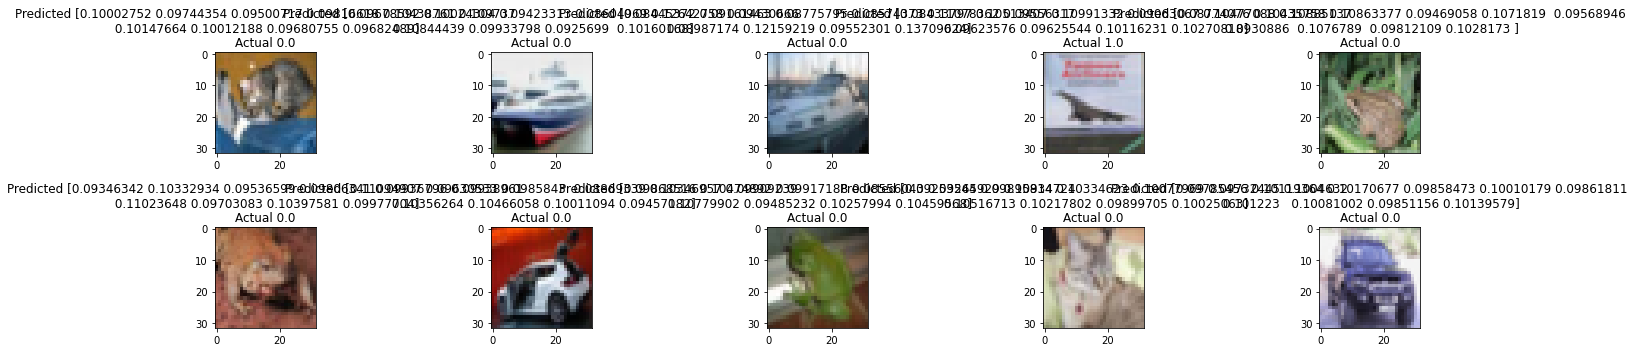

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(20, 5))
c = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_test[c])
        ax[i, j].set_title(f"Predicted {test_preds[c]}\nActual {Y_test[c][0]}")
        c += 1
plt.tight_layout()